### 📌 Project Title

### ***Diabetes Prediction Using Machine Learning (KNN Algorithm)***

In [1]:
# python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 📌 Dataset Used

***I used the diabetes dataset which contains***

> Pregnancies

> Glucose

> Blood Pressure

> Skin Thickness

> Insulin

> BMI

> Diabetes Pedigree Function

> Age

> Outcome (Target variable)

***The outcome is binary:***

> 0 → No Diabetes

> 1 → Diabetes



In [2]:
# data importing
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# statical describeing 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# column and rows
data.shape

(768, 9)

In [6]:
# any null values in the dataset
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# checking duplicated values
data.duplicated().sum()

0

In [8]:
# column names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

*📌 Problem Statement*

***Diabetes is a common lifestyle disease, and early detection is very important. The goal of this project is to predict whether a person has diabetes or not based on medical features using machine learning.***


*📌 Exploratory Data Analysis (EDA)*

**I performed EDA using visualizations:**

> Bar chart to understand class distribution

> Histogram of glucose vs outcome

> Histogram of BMI vs outcome

> From these plots, I observed:

> Diabetic patients generally have higher glucose levels

> BMI is also higher in diabetic patients

> The dataset is slightly imbalanced

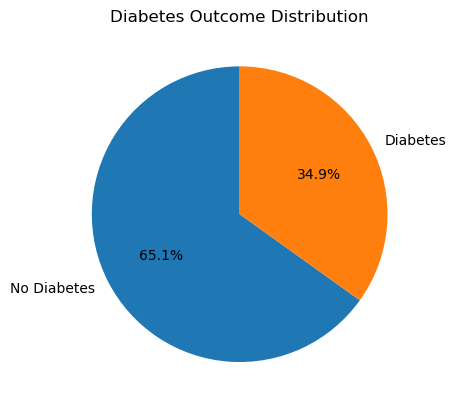

In [9]:
# Count values
counts = data['Outcome'].value_counts()

# Plot pie chart
plt.figure()
plt.pie(counts,labels=['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle=90)
plt.title("Diabetes Outcome Distribution")
plt.show()

*📌 Data Preprocessing*

***Before training the model:***

> *I separated features and target*

> *Applied StandardScaler because KNN depends on distance*

> *Split the data into training and testing sets*

In [10]:
# sklearn model importing for better analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve

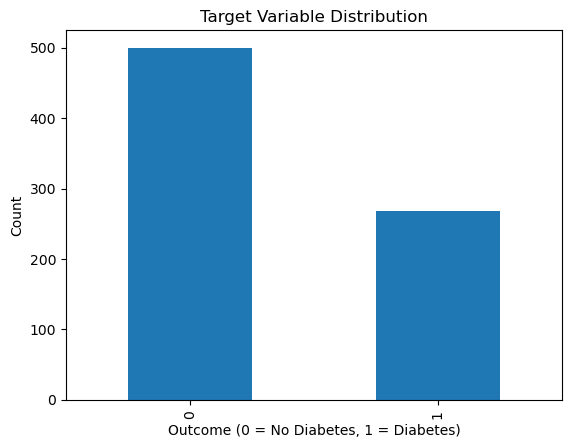

In [11]:
# bar plot 
plt.figure()
data["Outcome"].value_counts().plot(kind="bar")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()


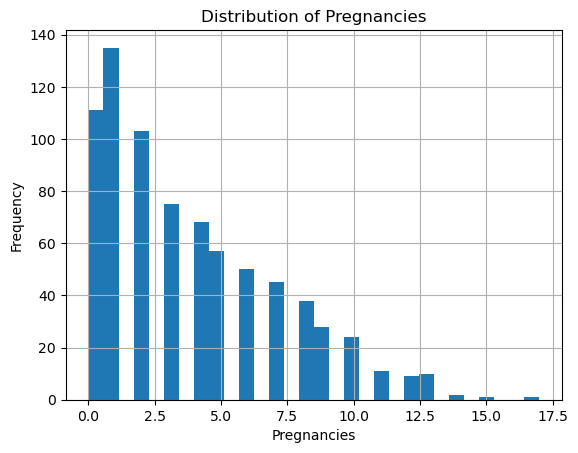

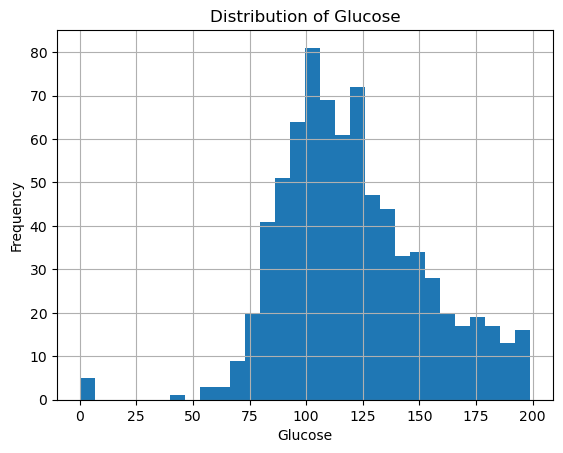

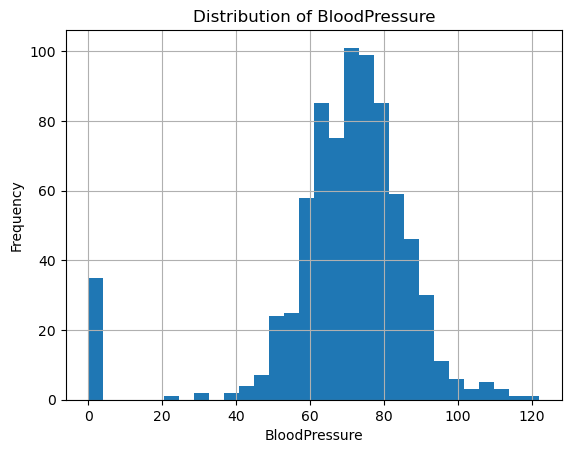

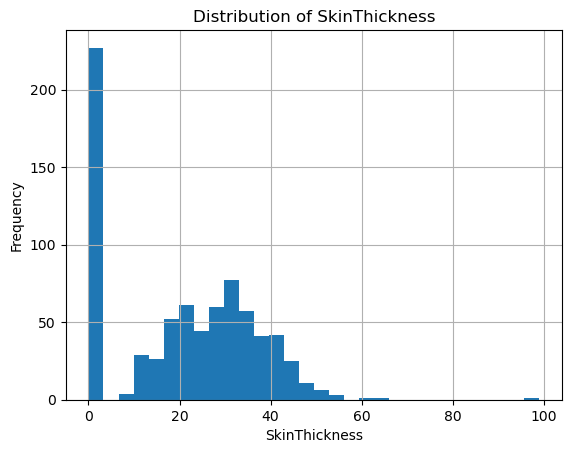

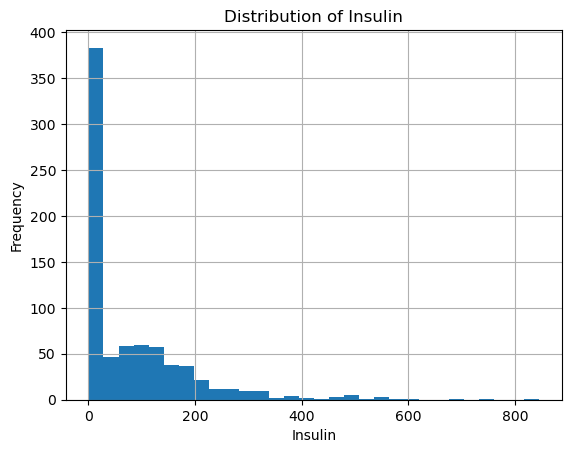

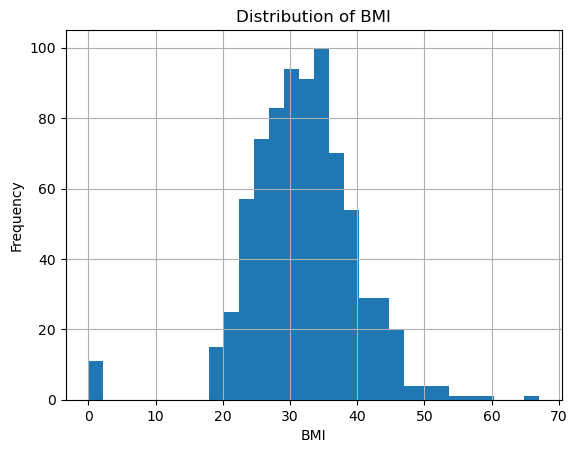

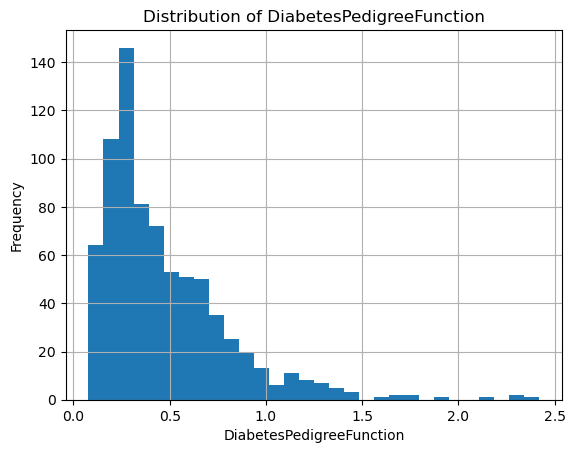

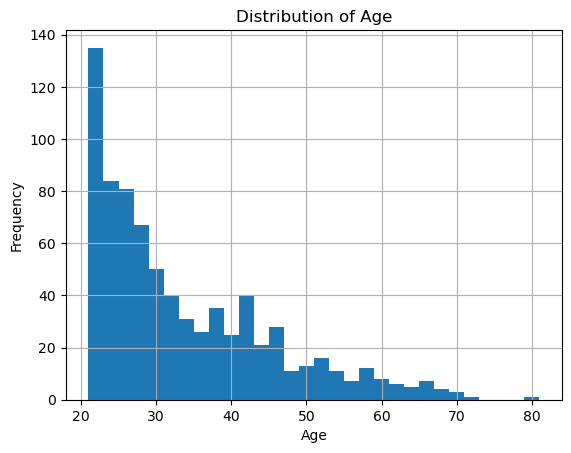

In [12]:
# hist plot 
for col in data.columns[:-1]:
    plt.figure()
    data[col].hist(bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


In [13]:
# testing the data from the train_test_split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


*📌 Model Evaluation*

**I evaluated the model using:**

> Accuracy score

> Classification report

> Confusion matrix

> ROC curve

> Precision-Recall curve

**The confusion matrix helped me understand:**

> True positives (correct diabetic predictions)

> False negatives (missed diabetic patients)

> In healthcare, false negatives are critical, so recall is more important than accuracy.

In [14]:
# logistic regression for comes between(0,1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


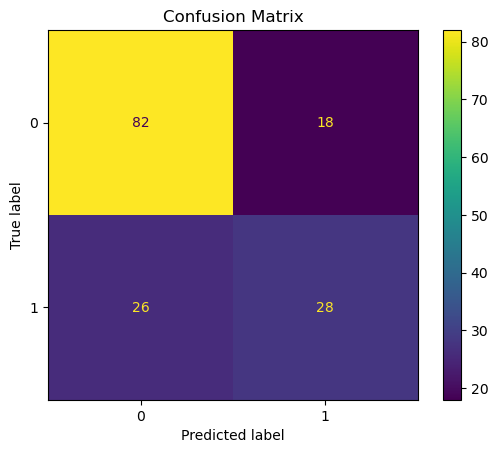

In [15]:
# confusion matrix tp,tn.fp,fn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


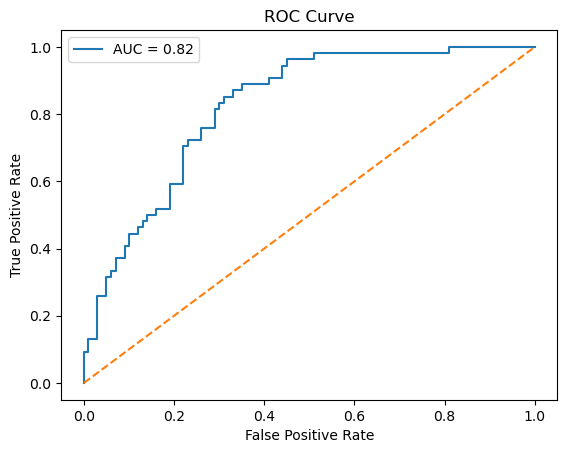

In [16]:
# roc curve line shows between (0, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


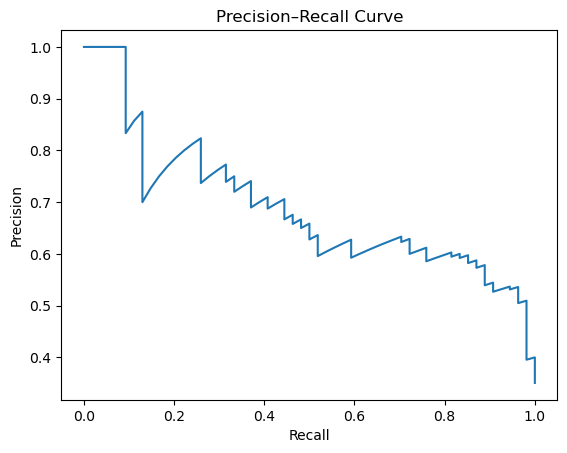

In [17]:
# precision recall cruve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


The precision–recall curve shows how well the model balances identifying diabetic patients while minimizing false predictions. Since healthcare applications prioritize recall, this curve helps evaluate the model beyond simple accuracy.

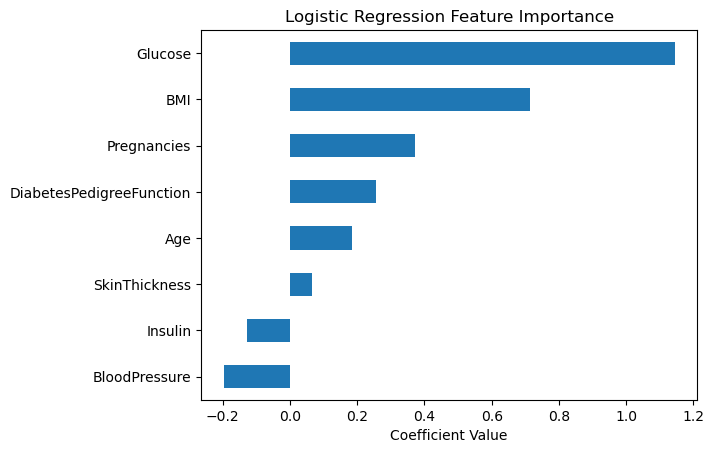

In [18]:
# coefficient plot 
coefficients = pd.Series(model.coef_[0],index=X.columns).sort_values()

plt.figure()
coefficients.plot(kind="barh")
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.show()


The coefficient plot shows how strongly each feature influences diabetes prediction in Logistic Regression, with positive values increasing risk and negative values decreasing it.

In [19]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


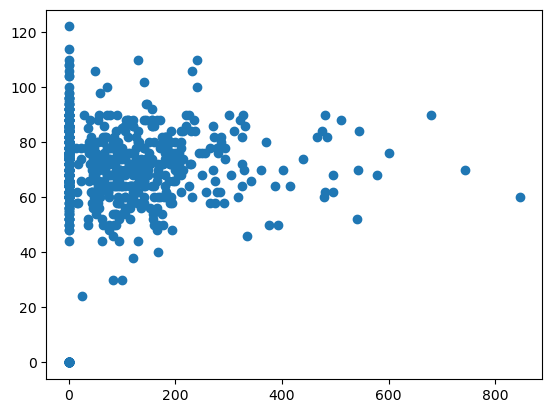

In [20]:
# scatter comparision betwwen insulin and blood pressure
plt.scatter(data['Insulin'],data['BloodPressure'])

*📌 Model Used – KNN*

**I used the K-Nearest Neighbors (KNN) algorithm because:**

> *It is simple and intuitive*

> *It works by comparing similar patients*

> *Suitable as a baseline medical classification model*

> *The model predicts diabetes based on the majority class of nearest neighbors.*

In [21]:
from sklearn.cluster import KMeans

# Select only the features (columns 0 to 7)
# This excludes the "Outcome" (Target) column
x = data.iloc[:, :-1].values 

In [22]:
wcss = []

for i in range(1, 11):
    # Initialize KMeans with 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    
    # inertia_ is the WCSS value
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

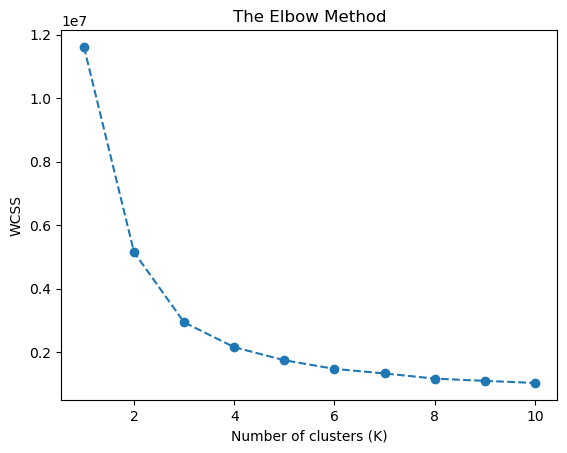

In [23]:
# elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [24]:
wcss

[11615812.918327225,
 5142376.455984383,
 2932905.881321157,
 2151320.938003855,
 1739468.6212710731,
 1467139.3870134635,
 1323650.649952253,
 1161086.0601046663,
 1089477.348445321,
 1024917.0714485875]

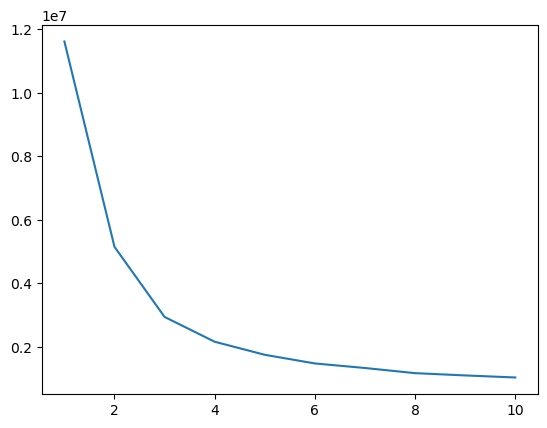

In [25]:
# plot 
plt.plot(range(1,11),wcss)

In [26]:
# X values
x = data.iloc[:, :-1].values 

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
# clustring 
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [29]:
# y_mean value
y_means

array([1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1,

In [41]:
X[y_means == 3, 1]

array([], dtype=float64)

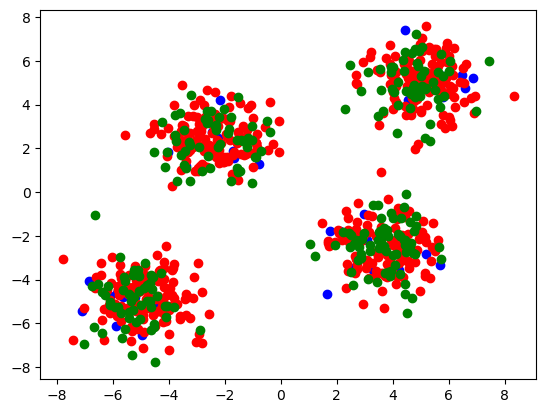

In [42]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

### K-Means on 3-D Data

In [32]:
# 3-D chart 
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=768,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [43]:
X

array([[-2.3591127 ,  3.29244077, -5.2671073 ],
       [ 3.44730122,  5.57846442, -5.9612636 ],
       [ 2.40191685, -1.74136294,  4.03261548],
       ...,
       [ 3.55837188, -1.77931407,  2.45455236],
       [ 4.96400982,  6.03703898, -4.32738025],
       [-2.36140452,  4.58412285, -3.61925655]])

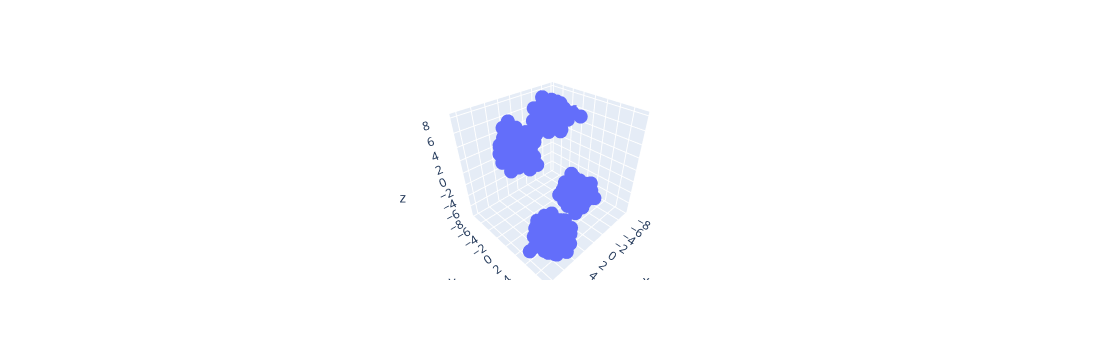

In [44]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [45]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

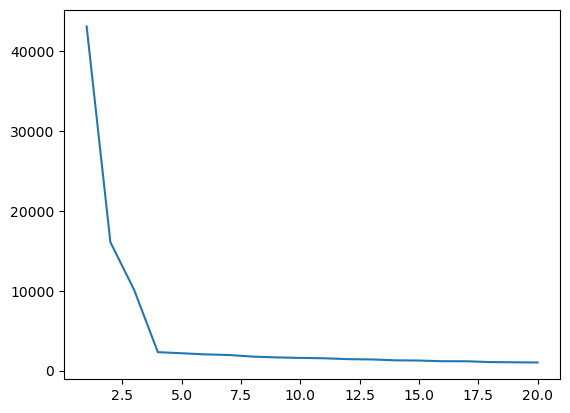

In [46]:
plt.plot(range(1,21),wcss)

In [47]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [48]:
data = pd.DataFrame()

data['col1'] = X[:,0]
data['col2'] = X[:,1]
data['col3'] = X[:,2]
data['label'] = y_pred

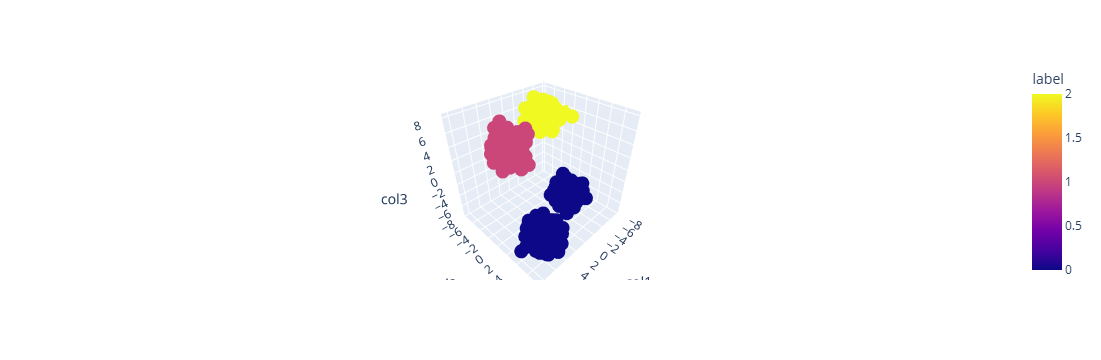

In [49]:
fig = px.scatter_3d(data,x='col1', y='col2', z='col3',color='label')
fig.show()

📌 Conclusion

In this project, I successfully performed a complete machine learning analysis for diabetes prediction using a structured and systematic approach. The objective of the project was to predict whether a person is diabetic or non-diabetic based on multiple medical attributes by applying data analysis, visualization, and machine learning techniques.

Initially, I loaded and explored the diabetes dataset to understand its structure, features, and target variable. The dataset contained medical parameters such as glucose level, BMI, blood pressure, insulin, age, and diabetes pedigree function, with the outcome variable representing diabetic and non-diabetic classes. Basic data inspection was carried out to check the dataset size, column information, and class distribution.

Next, I performed Exploratory Data Analysis (EDA) using multiple visualizations. A bar chart was used to analyze the distribution of diabetic and non-diabetic patients, which showed that the dataset is slightly imbalanced. Histograms were plotted for important features like glucose and BMI against the outcome variable, and these visualizations clearly indicated that higher glucose levels and higher BMI values are strongly associated with diabetes. These visual insights helped in understanding the medical relevance of features before model training.

In addition to 2D visualizations, I also implemented 3D visualization, which helped in analyzing the relationship between multiple features simultaneously along with the diabetes outcome. The 3D plot provided a deeper understanding of how combinations of features such as glucose, BMI, and age vary between diabetic and non-diabetic patients, making the data patterns more interpretable.

After data visualization, I performed data preprocessing, where I separated the independent features and the target variable. Since the K-Nearest Neighbors algorithm is distance-based, I applied feature scaling using StandardScaler to ensure that all features contribute equally to distance calculations. The dataset was then split into training and testing sets to evaluate the model performance on unseen data.

For prediction, I implemented the K-Nearest Neighbors (KNN) classification algorithm. KNN works by comparing a patient’s medical data with similar patients and predicting the outcome based on majority voting among nearest neighbors. The model was trained using the training data, and predictions were made on the test data.

To evaluate the model, I used multiple performance metrics including accuracy, confusion matrix, classification report, ROC curve, and precision-recall curve. The confusion matrix provided clear insight into true positives, true negatives, false positives, and false negatives. Special attention was given to recall, as missing diabetic patients (false negatives) is critical in medical applications. The ROC curve and precision-recall curve further helped in understanding the trade-off between sensitivity and precision.

Additionally, I performed hyperparameter tuning by testing different values of K and plotting K value versus accuracy to identify the optimal number of neighbors for the KNN model. This step helped in improving model stability and avoiding underfitting or overfitting.

Overall, this project demonstrates how data analysis, visualization (including 3D visualization), preprocessing, and machine learning can be effectively combined to predict diabetes. The KNN model provided a good baseline performance and offered intuitive, similarity-based predictions. Although the model shows reasonable accuracy, it also highlights the importance of improving recall for real-world healthcare applications. This project clearly illustrates the practical application of machine learning in the healthcare domain and lays the foundation for further improvement using advanced models.